In [1]:


from IPython.display import HTML



C:\Users\User\miniconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.9, the latest is 0.3.10.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


Current Working directory  C:\Users\User\GitHub\WebET_Analysis


## Change across trials

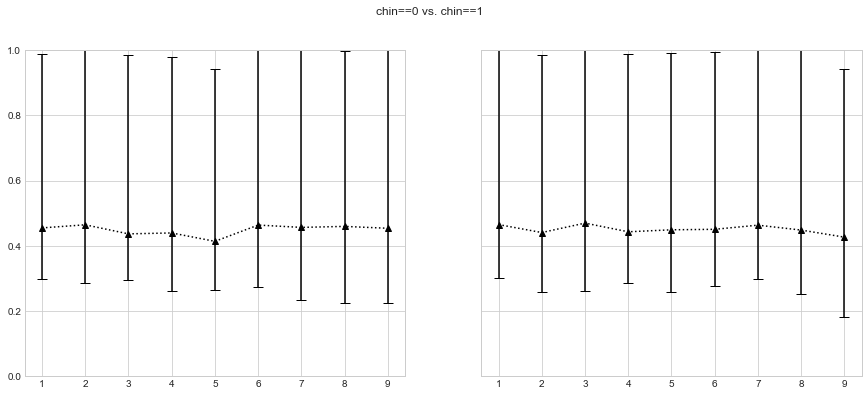

## Comparing across positions

### All positions

,run_id,x_pos,y_pos,offset,position,position_nr
0,4,0.2,0.2,0.778095,20.0%_20.0%,1
1,4,0.2,0.5,0.208599,20.0%_50.0%,2
2,4,0.2,0.8,0.436316,20.0%_80.0%,3
3,4,0.5,0.2,0.762093,50.0%_20.0%,4
4,4,0.5,0.5,0.207897,50.0%_50.0%,5


Success: No missing values found


position,run_id,20.0%_20.0%,20.0%_50.0%,20.0%_80.0%,50.0%_20.0%,50.0%_50.0%,50.0%_80.0%,80.0%_20.0%,80.0%_50.0%,80.0%_80.0%
0,4,0.778095,0.208599,0.436316,0.762093,0.207897,0.464888,0.877066,0.322680,0.521446
1,5,0.580502,0.087638,0.584828,0.571576,0.075722,0.662572,0.633379,0.057796,0.512343
2,6,0.477579,0.109199,0.575554,0.540228,0.151561,0.582478,0.479845,0.129393,0.575632
3,7,0.544732,0.076056,0.555658,0.525800,0.077544,0.544034,0.559057,0.061706,0.508407
4,11,0.466308,0.260419,0.405918,0.497799,0.175973,0.363130,0.579807,0.297330,0.444889
...,...,...,...,...,...,...,...,...,...,...
203,449,0.592762,0.112021,0.581411,0.544652,0.198585,0.633887,0.501353,0.113508,0.530778
204,454,0.548184,0.077071,0.589729,0.566089,0.181601,0.613863,0.534143,0.057751,0.586720
205,456,0.571566,0.084609,0.565815,0.459018,0.090945,0.614104,0.510876,0.083485,0.630299
206,458,0.423474,0.311148,0.444727,0.312709,0.072359,0.305222,0.435215,0.295295,0.410689


N combinations: 36


# Precision

## Distance from AVG on et-level

<ipython-input-41-ca53af98e2a3>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped = data.groupby(['run_id', 'trial_index'])['x', 'y'].mean() \


Empty DataFrame
Columns: [x, y, x_pos, y_pos, distance_from_xy_mean_square]
Index: []


,distance_from_xy_mean_square,distanceFromAVG_square_px
count,2.149320e+05,2.149320e+05
mean,7.145013e-03,1.071460e+04
std,2.613690e-02,3.396292e+04
min,1.232595e-32,5.169879e-26
25%,8.204835e-04,1.120252e+03
50%,2.415132e-03,3.435563e+03
75%,6.283492e-03,9.409318e+03
max,3.006582e+00,3.025471e+06



# Randomization check (chinFirst)
Maybe the variance increases over time

## Plot

In [55]:
data_plot = data_trial_fix \
    .groupby(['run_id', 'chinFirst', 'chin'], as_index=False) \
    ['offset', 'precision', 'fps'].mean()
data_plot.head(5)

<ipython-input-55-808d6144ee75>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_plot = data_trial_fix \


,run_id,chinFirst,chin,offset,precision,fps
0,4,0,0.0,0.574634,0.110628,10.708130
1,4,0,1.0,0.442940,0.073472,10.898692
2,5,1,0.0,0.418705,0.053254,20.663857
3,5,1,1.0,0.418263,0.045604,20.650361
4,6,0,0.0,0.375948,0.065555,10.426491


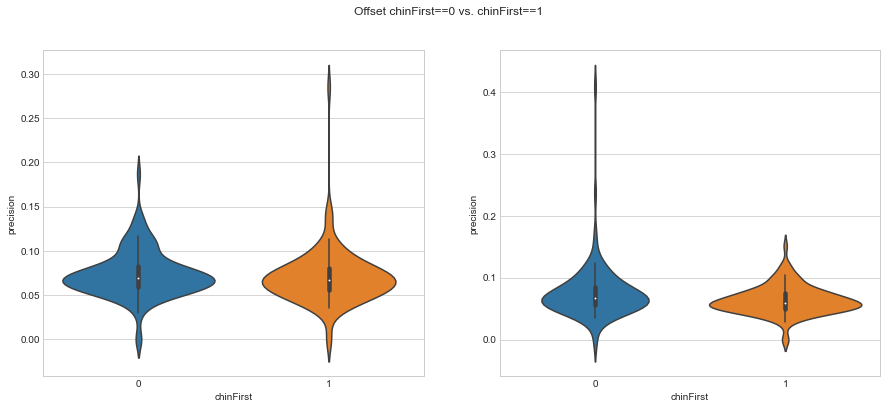

In [56]:
fig, axes = plt.subplots(1, 2, sharey=False, figsize=(15,6))
fig.suptitle('Offset chinFirst==0 vs. chinFirst==1')

sns.violinplot(ax=axes[0], x='chinFirst', y='precision', 
            data=data_plot.loc[data_plot['chin']==0, :])
sns.violinplot(ax=axes[1], x='chinFirst', y='precision', 
            data=data_plot.loc[data_plot['chin']==1, :])
   
plt.show()

## ttest
Tendency for lower overall precision for those who started with the chin-rest, not for Holm correction

In [57]:
outcomes_by_chin = data_plot \
    .groupby(['run_id', 'chinFirst'], as_index=False) \
    ['offset', 'precision', 'fps'].mean() \
    .pivot(
        index='run_id', 
        columns='chinFirst', 
        values=['offset', 'precision', 'fps'])

<ipython-input-57-70d6dd3f3846>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  outcomes_by_chin = data_plot \


In [58]:
summary = outcomes_by_chin.mean() \
    .reset_index() \
    .rename(columns={'level_0': 'measure', 0: 'mean'}) \
    .assign(SD=outcomes_by_chin.std().reset_index(drop=True)) \
    .assign(n = outcomes_by_chin.count().reset_index(drop=True))
summary

,measure,chinFirst,mean,SD,n
0,offset,0,0.400106,0.049656,106
1,offset,1,0.399244,0.053131,102
2,precision,0,0.074837,0.031464,106
3,precision,1,0.067006,0.023747,102
4,fps,0,14.855431,5.449329,106
5,fps,1,13.767931,5.592003,102


In [59]:
def t_test(outcome_var):
    return scipy.stats.ttest_ind(
        outcomes_by_chin.loc[:, [(outcome_var, 0.0)]].dropna(),
        outcomes_by_chin.loc[:, [(outcome_var, 1.0)]].dropna()
    )

result_offset = t_test('offset')
print(result_offset)
result_precision = t_test('precision')
result_fps = t_test('fps')

chin_test = pd.DataFrame({
    'measure': ['offset', 'precision', 'fps'],
    't': [
        t_test('offset').statistic, 
        t_test('precision').statistic,
        t_test('fps').statistic
    ],
    'p': [
        t_test('offset').pvalue, 
        t_test('precision').pvalue,
        t_test('fps').pvalue
    ]
    }
)
chin_test['t'] = (chin_test['t']).astype(float)
# Holm correction
chin_test['p'] = smt.multipletests(chin_test['p'], method='holm')[1].astype(float)
chin_test

summary.merge(
    chin_test, 
    on='measure',
    how='left'
)

Ttest_indResult(statistic=array([0.12100279]), pvalue=array([0.90380677]))


,measure,chinFirst,mean,SD,n,t,p
0,offset,0,0.400106,0.049656,106,0.121003,0.903807
1,offset,1,0.399244,0.053131,102,0.121003,0.903807
2,precision,0,0.074837,0.031464,106,2.020168,0.133983
3,precision,1,0.067006,0.023747,102,2.020168,0.133983
4,fps,0,14.855431,5.449329,106,1.420469,0.313966
5,fps,1,13.767931,5.592003,102,1.420469,0.313966


# Difference in order of task

1 vs 2

In [60]:
outcomes_by_fix_order = data_trial_fix \
    .rename(columns={'task_nr': 'fix_order'}) \
    .groupby(['run_id', 'fix_order'], as_index=False) \
    ['offset', 'precision', 'fps'].mean()
outcomes_by_fix_order['fix_order'] = outcomes_by_fix_order['fix_order'] \
    .replace({3.0: 2.0}) \
    .astype(int)

outcomes_by_fix_order = outcomes_by_fix_order \
    .pivot(
        index='run_id', 
        columns='fix_order', 
        values=['offset', 'precision', 'fps'])
outcomes_by_fix_order.head(5)

<ipython-input-60-ac02e473d293>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  outcomes_by_fix_order = data_trial_fix \


offset           precision                  fps           
fix_order         1         2         1         2          1          2
run_id                                                                 
4          0.574634  0.442940  0.110628  0.073472  10.708130  10.898692
5          0.418263  0.418705  0.045604  0.053254  20.650361  20.663857
6          0.375948  0.428822  0.065555  0.054322  10.426491  10.321413
7          0.379461  0.387871  0.069824  0.060104  34.708792  34.024510
11         0.354831  0.421074  0.114246  0.237067  24.338844  24.796158

In [61]:
summary = outcomes_by_fix_order.mean() \
    .reset_index() \
    .rename(columns={'level_0': 'measure', 0: 'mean'}) \
    .assign(SD=outcomes_by_fix_order.std().reset_index(drop=True)) \
    .assign(n = outcomes_by_fix_order.count().reset_index(drop=True))

In [62]:
def t_test(outcome_var):
    return scipy.stats.ttest_rel(
    outcomes_by_fix_order.loc[:, [(outcome_var, 1)]],
    outcomes_by_fix_order.loc[:, [(outcome_var, 2)]]
)

result_offset = t_test('offset')
result_precision = t_test('precision')
result_fps = t_test('fps')

chin_test = pd.DataFrame({
    'measure': ['offset', 'precision', 'fps'],
    't': [
        t_test('offset').statistic, 
        t_test('precision').statistic,
        t_test('fps').statistic
    ],
    'p': [
        t_test('offset').pvalue, 
        t_test('precision').pvalue,
        t_test('fps').pvalue
    ]
    }
)
chin_test['t'] = (chin_test['t']).astype(float)
# Holm correction
chin_test['p'] = smt.multipletests(chin_test['p'], method='holm')[1].astype(float)

summary.merge(
    chin_test, 
    on='measure',
    how='left'
)

,measure,fix_order,mean,SD,n,t,p
0,offset,1,0.397540,0.054393,208,-0.872700,0.767676
1,offset,2,0.401827,0.069336,208,-0.872700,0.767676
2,precision,1,0.068812,0.025045,208,-1.895984,0.178065
3,precision,2,0.073182,0.038866,208,-1.895984,0.178065
4,fps,1,14.346589,5.647547,208,0.706027,0.767676
5,fps,2,14.297686,5.462494,208,0.706027,0.767676


## Plot
There is a greater variance in the second run

In [63]:
outcomes_by_fix_order = data_trial_fix \
    .rename(columns={'task_nr': 'fix_order'}) \
    .groupby(['run_id', 'chin', 'fix_order'], as_index=False) \
    ['offset', 'precision', 'fps'].mean()
outcomes_by_fix_order['fix_order'] = outcomes_by_fix_order['fix_order'] \
    .replace({3.0: 2.0}) \
    .astype(int)
outcomes_by_fix_order

<ipython-input-63-2f0f23492e59>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  outcomes_by_fix_order = data_trial_fix \


,run_id,chin,fix_order,offset,precision,fps
0,4,0.0,1,0.574634,0.110628,10.708130
1,4,1.0,2,0.442940,0.073472,10.898692
2,5,0.0,2,0.418705,0.053254,20.663857
3,5,1.0,1,0.418263,0.045604,20.650361
4,6,0.0,1,0.375948,0.065555,10.426491
...,...,...,...,...,...,...
411,456,1.0,2,0.372937,0.075037,14.312662
412,458,0.0,1,0.337875,0.053500,11.211313
413,458,1.0,2,0.331200,0.060029,11.771301
414,462,0.0,2,0.389491,0.090642,8.692669


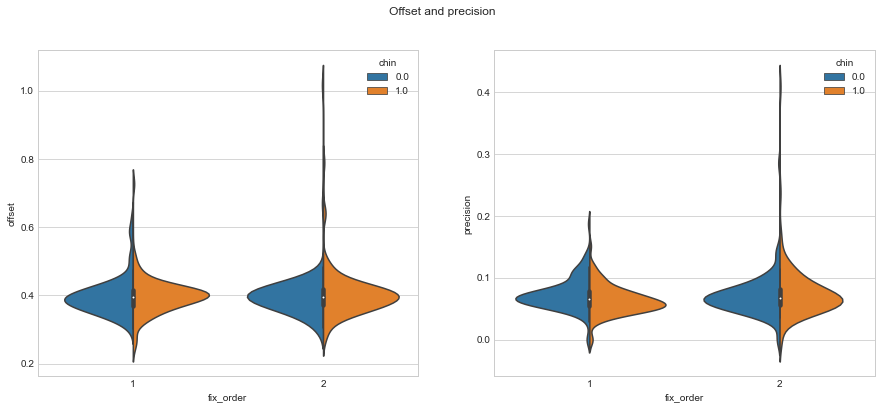

In [64]:
fig, axes = plt.subplots(1, 2, sharey=False, figsize=(15,6))
fig.suptitle('Offset and precision')

sns.violinplot(
    ax=axes[0], x='fix_order', y='offset', 
    hue='chin', split=True,
    data=outcomes_by_fix_order)
sns.violinplot(
    ax=axes[1], x='fix_order', y='precision', 
    hue='chin', split=True,
    data=outcomes_by_fix_order)
   
plt.show()

# Main effects 

## Chin-rest

### Plots

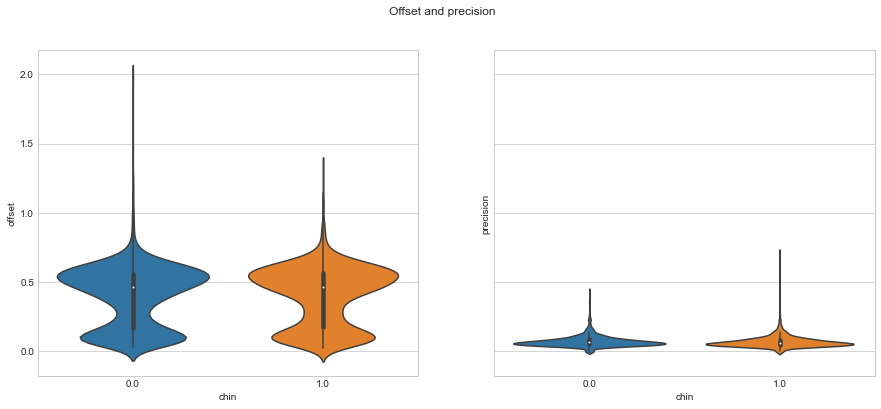

In [65]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15,6))
fig.suptitle('Offset and precision')

sns.violinplot(ax=axes[0], 
               x='chin', 
               y='offset', 
               data=data_trial_fix)
sns.violinplot(ax=axes[1], 
               x='chin', 
               y='precision', 
               data=data_trial_fix)
   
plt.show()

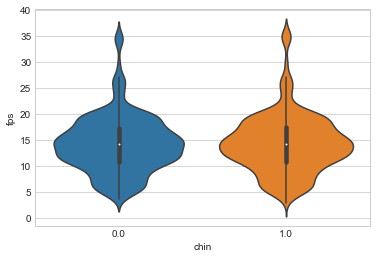

In [66]:
sns.violinplot(x='chin', y='fps', data=data_trial_fix)   
plt.show()

### ttest

In [67]:
offset_and_precision_by_chin = data_trial \
    .groupby(['run_id', 'chin'], as_index=False)['offset', 'precision', 'fps'].mean() \
    .pivot(index='run_id', columns='chin', values=['offset', 'precision', 'fps'])
offset_and_precision_by_chin.head(5)

<ipython-input-67-e9fd5524f623>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  offset_and_precision_by_chin = data_trial \


offset           precision                  fps           
chin         0.0       1.0       0.0       1.0        0.0        1.0
run_id                                                              
4       0.448773  0.236561  0.158217  0.124455  10.784549  10.557628
5       0.349102  0.287941  0.139792  0.155056  17.656564  17.868898
6       0.329497  0.290063  0.138479  0.159867  11.214318  10.193433
7       0.309659  0.161231  0.116133  0.175224  33.850670  31.817128
11      0.359008  0.302409  0.159709  0.176506  21.441252  21.459141

In [68]:
summary = offset_and_precision_by_chin.mean() \
    .reset_index() \
    .rename(columns={'level_0': 'measure', 0: 'mean'}) \
    .assign(SD=offset_and_precision_by_chin.std().reset_index(drop=True))
summary

,measure,chin,mean,SD
0,offset,0.0,0.330534,0.053915
1,offset,1.0,0.251421,0.068150
2,precision,0.0,0.132824,0.049459
3,precision,1.0,0.138626,0.037313
4,fps,0.0,14.803259,5.536203
5,fps,1.0,15.195614,5.641650


In [69]:
def t_test(outcome_var):
    return scipy.stats.ttest_rel(
    offset_and_precision_by_chin.loc[:, [(outcome_var, 0.0)]],
    offset_and_precision_by_chin.loc[:, [(outcome_var, 1.0)]]
)

result_offset = t_test('offset')
result_precision = t_test('precision')
result_fps = t_test('fps')

chin_test = pd.DataFrame({
    'measure': ['offset', 'precision', 'fps'],
    't': [
        t_test('offset').statistic, 
        t_test('precision').statistic,
        t_test('fps').statistic
    ],
    'p': [
        t_test('offset').pvalue, 
        t_test('precision').pvalue,
        t_test('fps').pvalue
    ]
    }
)
chin_test['t'] = (chin_test['t']).astype(float)
# Holm correction
chin_test['p'] = smt.multipletests(chin_test['p'], method='holm')[1].astype(float)

summary.merge(
    chin_test, 
    on='measure',
    how='left'
)

,measure,chin,mean,SD,t,p
0,offset,0.0,0.330534,0.053915,18.260834,1.535310e-44
1,offset,1.0,0.251421,0.068150,18.260834,1.535310e-44
2,precision,0.0,0.132824,0.049459,-1.551017,1.224251e-01
3,precision,1.0,0.138626,0.037313,-1.551017,1.224251e-01
4,fps,0.0,14.803259,5.536203,-3.970283,1.980333e-04
5,fps,1.0,15.195614,5.641650,-3.970283,1.980333e-04


## Glasses

### Frequency of visual aids

In [70]:
for col in ['glasses', 'sight', 'glasses_binary']:
    print(pd.crosstab(index=data_subject[col], columns="count"))
    print('\n')

col_0         count
glasses            
longSight        21
noCorrection     94
progressive      17
shortSight       76


col_0          count
sight               
contactLenses     25
glasses           85
notCorrected       8
perfectSight      90


col_0           count
glasses_binary       
0.0               123
1.0                85




### Plots

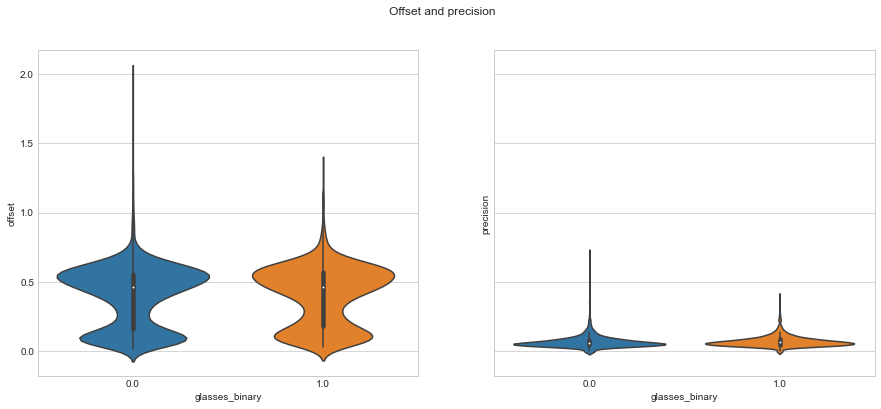

In [71]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15,6))
fig.suptitle('Offset and precision')

sns.violinplot(ax=axes[0], 
               x='glasses_binary', 
               y='offset', 
               data=data_trial_fix)
sns.violinplot(ax=axes[1], 
               x='glasses_binary', 
               y='precision', 
               data=data_trial_fix)
   
plt.show()

### Sight

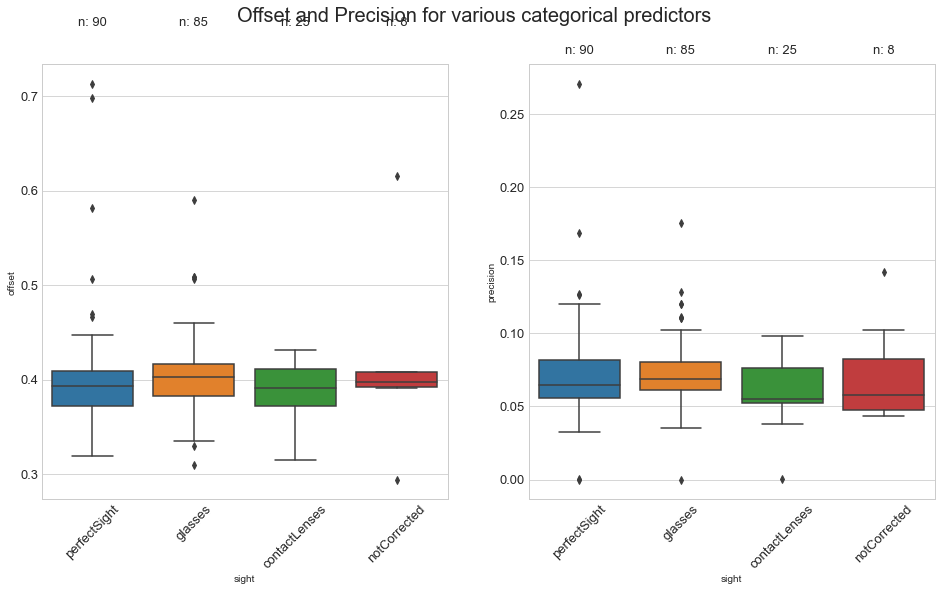

In [72]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
fig.suptitle('Offset and Precision for various categorical predictors', fontsize=20)
plt.subplots_adjust(hspace=0.5)

outcomes = ['offset', 'precision']
ax = ax.ravel()

for i in range(0, 2):
    sns.boxplot(ax=ax[i], x='sight', y=outcomes[i], data=data_subject)

    ax[i].tick_params(labelrotation=45, labelsize=13)
    ax[i].tick_params(axis='y', labelrotation=None)
    
    nobs = data_subject['sight'].value_counts().values
    nobs = [str(x) for x in nobs.tolist()]
    nobs = ["n: " + i for i in nobs]
    # Add it to the plot
    pos = range(len(nobs))
    
    max_value = data_subject[outcomes[i]].max()
    yPos = max_value + max_value * 0.1
    
    for tick,label in zip(pos,ax[i].get_xticklabels()):                
        ax[i].text(
            pos[tick], yPos, nobs[tick],
            verticalalignment='top',
            horizontalalignment='center', size=13, weight='normal')

In [73]:
sight_lm = ols('offset ~ sight', data=data_subject).fit()
offset_table = sm.stats.anova_lm(sight_lm, typ=2) # Type 2 ANOVA DataFrame

sight_lm = ols('precision ~ sight', data=data_subject).fit()
precision_table = sm.stats.anova_lm(sight_lm, typ=2) # Type 2 ANOVA DataFrame

print(
    f"""Offset table: \n """
    f"""{offset_table} \n \n"""
    f"""Precision table: \n"""
    f"""{precision_table}"""
)

Offset table: 
             sum_sq     df         F    PR(>F)
sight     0.004164    3.0  0.524558  0.665877
Residual  0.539841  204.0       NaN       NaN 
 
Precision table: 
            sum_sq     df         F    PR(>F)
sight     0.002213    3.0  0.929536  0.427385
Residual  0.161890  204.0       NaN       NaN


### ttest

In [74]:
offset_and_precision_by_glasses = data_subject \
    .pivot(index='run_id', columns='glasses_binary', values=['offset', 'precision'])

In [75]:
summary = offset_and_precision_by_glasses.mean() \
    .reset_index() \
    .rename(columns={'level_0': 'measure', 0: 'mean'}) \
    .assign(n = offset_and_precision_by_glasses.count().reset_index(drop=True)) \
    .assign(Var=offset_and_precision_by_glasses.var().reset_index(drop=True))

In [76]:
result_offset = scipy.stats.ttest_ind(
    offset_and_precision_by_glasses.loc[:, [('offset', 0.0)]].dropna(),
    offset_and_precision_by_glasses.loc[:, [('offset', 1.0)]].dropna(),
    equal_var = False
)

result_precision = scipy.stats.ttest_ind(
    offset_and_precision_by_glasses.loc[:, [('precision', 0.0)]].dropna(),
    offset_and_precision_by_glasses.loc[:, [('precision', 1.0)]].dropna(),
    equal_var = False
)

glasses_test = pd.DataFrame({
    'measure': ['offset', 'precision'],
    't': [result_offset.statistic, result_precision.statistic],
    'p': [result_offset.pvalue, result_precision.pvalue]
    }
)
glasses_test['t'] = (glasses_test['t']).astype(float)
glasses_test['p'] = (glasses_test['p']).astype(float)

summary.merge(
    glasses_test, 
    on='measure',
    how='left'
)

,measure,glasses_binary,mean,n,Var,t,p
0,offset,0.0,0.398075,123,0.003296,-0.575540,0.565555
1,offset,1.0,0.402002,85,0.001679,-0.575540,0.565555
2,precision,0.0,0.069872,123,0.000974,-0.729293,0.466655
3,precision,1.0,0.072621,85,0.000534,-0.729293,0.466655


## Visual aid & chin rest

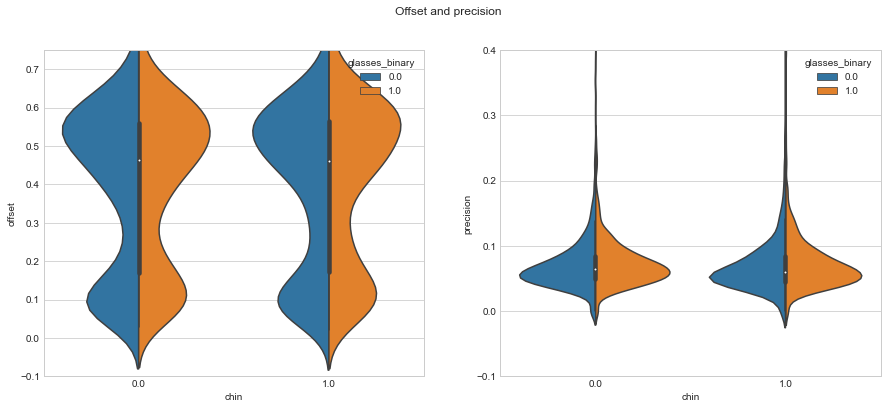

In [77]:
fig, axes = plt.subplots(1, 2, sharey=False, figsize=(15,6))
fig.suptitle('Offset and precision')

ax = sns.violinplot(ax=axes[0], 
               x='chin', 
               y='offset', 
               hue='glasses_binary',
               split=True,
               data=data_trial_fix)
ax.set(ylim=(-0.1, 0.75))

ax = sns.violinplot(ax=axes[1], 
               x='chin', 
               y='precision', 
               hue='glasses_binary',
               split=True,
               data=data_trial_fix)
ax.set(ylim=(-0.1, 0.4))

plt.show()

## Only those with high fps
 (Semmelmann & Weigelt, 2019)

### Chin-rest

In [78]:
runs_high_fps = data_subject.loc[
    data_subject['fps']>data_subject['fps'].median(), 
    'run_id'
]

offset_and_precision_by_chin = data_trial \
    .loc[data_trial['run_id'].isin(runs_high_fps), :] \
    .groupby(['run_id', 'chin'], as_index=False)['offset', 'precision'].mean() \
    .pivot(index='run_id', columns='chin', values=['offset', 'precision'])
offset_and_precision_by_chin.head(5)

<ipython-input-78-c26a560ebc6b>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  offset_and_precision_by_chin = data_trial \


offset           precision          
chin         0.0       1.0       0.0       1.0
run_id                                        
5       0.349102  0.287941  0.139792  0.155056
7       0.309659  0.161231  0.116133  0.175224
11      0.359008  0.302409  0.159709  0.176506
13      0.336694  0.274011  0.123051  0.184452
19      0.318761  0.202312  0.113386  0.160638

In [79]:
summary = offset_and_precision_by_chin.mean() \
    .reset_index() \
    .rename(columns={'level_0': 'measure', 0: 'mean'}) \
    .assign(Var=offset_and_precision_by_chin.var().reset_index(drop=True))

In [80]:
result_offset = scipy.stats.ttest_rel(
    offset_and_precision_by_chin.loc[:, [('offset', 0.0)]],
    offset_and_precision_by_chin.loc[:, [('offset', 1.0)]]
)

result_precision = scipy.stats.ttest_rel(
    offset_and_precision_by_chin.loc[:, [('precision', 0.0)]],
    offset_and_precision_by_chin.loc[:, [('precision', 1.0)]]
)

chin_test = pd.DataFrame({
    'measure': ['offset', 'precision'],
    't': [result_offset.statistic, result_precision.statistic],
    'p': [result_offset.pvalue, result_precision.pvalue]
    }
)
chin_test['t'] = (chin_test['t']).astype(float)
chin_test['p'] = (chin_test['p']).astype(float)

chin_test

summary.merge(
    chin_test, 
    on='measure',
    how='left'
)

,measure,chin,mean,Var,t,p
0,offset,0.0,0.338231,0.004279,12.997632,1.910881e-23
1,offset,1.0,0.254270,0.004626,12.997632,1.910881e-23
2,precision,0.0,0.135447,0.004315,-2.360140,2.015170e-02
3,precision,1.0,0.150804,0.001335,-2.360140,2.015170e-02


In [81]:
offset_and_precision_by_chin = data_trial \
    .loc[data_trial['run_id'].isin(runs_high_fps), :] \
    .groupby(['run_id', 'chin'], as_index=False)['offset', 'precision'].mean() \
    .pivot(index='run_id', columns='chin', values=['offset', 'precision'])
offset_and_precision_by_chin.head(5)

<ipython-input-81-8e4ee5df8c67>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  offset_and_precision_by_chin = data_trial \


offset           precision          
chin         0.0       1.0       0.0       1.0
run_id                                        
5       0.349102  0.287941  0.139792  0.155056
7       0.309659  0.161231  0.116133  0.175224
11      0.359008  0.302409  0.159709  0.176506
13      0.336694  0.274011  0.123051  0.184452
19      0.318761  0.202312  0.113386  0.160638

In [82]:
summary = offset_and_precision_by_chin.mean() \
    .reset_index() \
    .rename(columns={'level_0': 'measure', 0: 'mean'}) \
    .assign(Var=offset_and_precision_by_chin.var().reset_index(drop=True))

### Glasses

In [83]:
offset_and_precision_by_glasses = data_subject \
    .loc[data_subject['run_id'].isin(runs_high_fps), :] \
    .pivot(index='run_id', columns='glasses_binary', values=['offset', 'precision'])

In [84]:
summary = offset_and_precision_by_glasses.mean() \
    .reset_index() \
    .rename(columns={'level_0': 'measure', 0: 'mean'}) \
    .assign(n = offset_and_precision_by_glasses.count().reset_index(drop=True)) \
    .assign(Var=offset_and_precision_by_glasses.var().reset_index(drop=True))

In [85]:
result_offset = scipy.stats.ttest_ind(
    offset_and_precision_by_glasses.loc[:, [('offset', 0.0)]].dropna(),
    offset_and_precision_by_glasses.loc[:, [('offset', 1.0)]].dropna(),
    equal_var = False
)

result_precision = scipy.stats.ttest_ind(
    offset_and_precision_by_glasses.loc[:, [('precision', 0.0)]].dropna(),
    offset_and_precision_by_glasses.loc[:, [('precision', 1.0)]].dropna(),
    equal_var = False
)

glasses_test = pd.DataFrame({
    'measure': ['offset', 'precision'],
    't': [result_offset.statistic, result_precision.statistic],
    'p': [result_offset.pvalue, result_precision.pvalue]
    }
)
glasses_test['t'] = (glasses_test['t']).astype(float)
glasses_test['p'] = (glasses_test['p']).astype(float)

summary.merge(
    glasses_test, 
    on='measure',
    how='left'
)

,measure,glasses_binary,mean,n,Var,t,p
0,offset,0.0,0.406862,63,0.004809,0.78529,0.434262
1,offset,1.0,0.398951,41,0.001032,0.78529,0.434262
2,precision,0.0,0.071965,63,0.000912,-0.39669,0.692496
3,precision,1.0,0.074179,41,0.000684,-0.39669,0.692496


# Additional analyis

## Heatmap

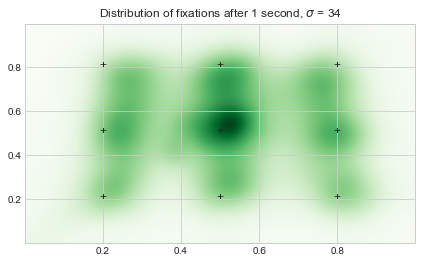

<Figure size 432x288 with 0 Axes>

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter

x = data_et_fix.loc[
    (data_et_fix['x']>0) & (data_et_fix['x']<1) &
    (data_et_fix['y']>0) & (data_et_fix['y']<1),
    'x']

y = data_et_fix.loc[
    (data_et_fix['x']>0) & (data_et_fix['x']<1) &
    (data_et_fix['y']>0) & (data_et_fix['y']<1),
    'y']

def myplot(x, y, s, bins=[1200, 675]):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent

s=34
img, extent = myplot(x, y, s=s)

plt.figure(figsize=(7, 7))
plt.imshow(img, extent=extent, origin='upper', cmap=cm.Greens, aspect=(9/16))
plt.title("Distribution of fixations after 1 second, $\sigma$ = %d" % s)


xPos = [0.2, 0.5, 0.8, 0.2, 0.5, 0.8, 0.2, 0.5, 0.8]
yPos = [0.2, 0.2, 0.2, 0.5, 0.5, 0.5, 0.8, 0.8, 0.8]
for i in range(0, len(xPos)):
    plt.text(xPos[i], yPos[i], '+', size=12, ha="center")

plt.show()
plt.savefig('plots/fix_heatmap.png')

## Exemplary trials for each position

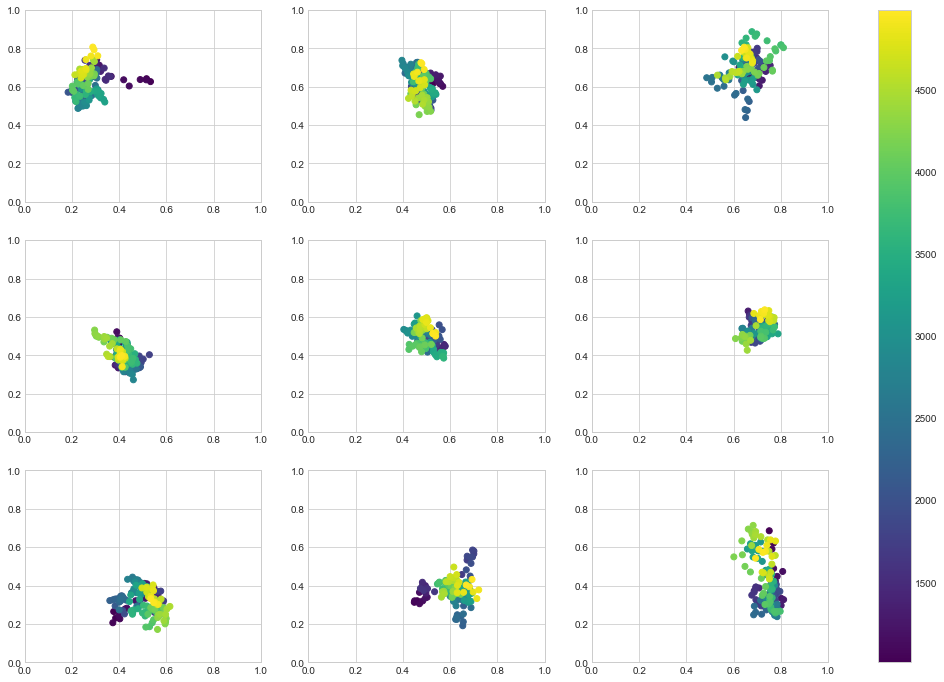

In [87]:
data_plot = merge_by_index(data_et_fix, data_trial, 'chin')
data_plot = data_plot.loc[
    (data_plot['run_id']==43) & 
    (data_plot['chin']==0), :]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.ravel()
xPos = [0.2, 0.5, 0.8, 0.2, 0.5, 0.8, 0.2, 0.5, 0.8]
yPos = [0.2, 0.2, 0.2, 0.5, 0.5, 0.5, 0.8, 0.8, 0.8]
for i in range(0, 9):
    axes_data = data_plot.loc[(data_plot['x_pos']==xPos[i]) & (data_plot['y_pos']==yPos[i]), :]
    im = axes[i].scatter(
        axes_data['x'], 
        axes_data['y'], 
        c=axes_data['t_task'], 
        cmap='viridis'
    )
    axes[i].set_ylim(0, 1)
    axes[i].set_xlim(0, 1)
    
fig.colorbar(im, ax=axes)
plt.show()

## Median offset across calibration trials
Does data quality improve during calibration? 

In [88]:
data_et_calibration = data_et.loc[data_et['trial_type']=='eyetracking-calibration', :]
data_trial_calibration = data_trial \
    .loc[data_trial['trial_type']=='eyetracking-calibration', :]

# Add median offset 
grouped = data_et_calibration \
    .groupby(['run_id', 'trial_index'])['offset'].median() \
    .reset_index() \
    .rename(columns={'offset': 'offset_median'}) 
data_trial_calibration = data_trial_calibration.merge(
    grouped,
    on=['run_id', 'trial_index'],
    how='left'
)

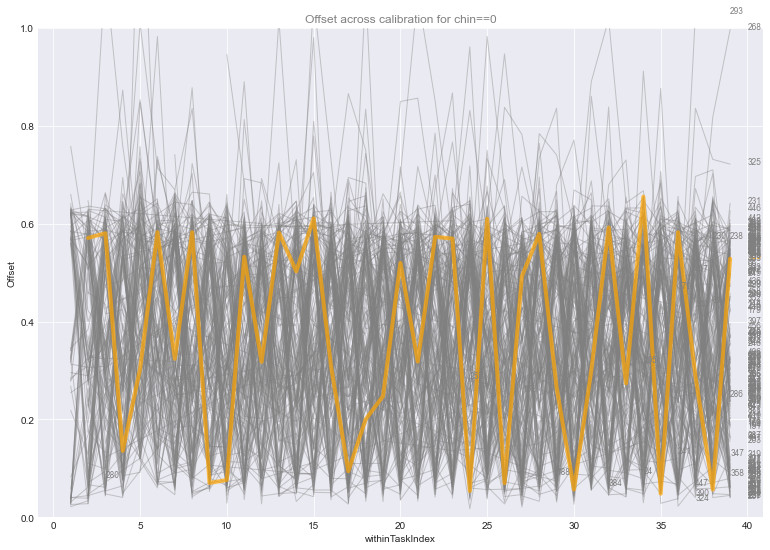

In [89]:
def spaghettiPlot(data, xVar, yVar, highlightedSubject):
    plt.style.use('seaborn-darkgrid')
    fig, ax = plt.subplots(figsize=(13, 9))

    # Draw Plots
    for subject in data["run_id"].unique():
        ax.plot(data.loc[data['run_id']==subject, xVar], 
                data.loc[data['run_id']==subject, yVar], 
                marker='', color='grey', linewidth=1, alpha=0.4)

    # Highlight Subject 
    ax.plot(data.loc[data['run_id']==highlightedSubject, xVar], 
            data.loc[data['run_id']==highlightedSubject, yVar], 
            marker='', color='orange', linewidth=4, alpha=0.7)

    # Let's annotate the plot
    for subject in data["run_id"].unique():
        if subject != highlightedSubject:
            ax.text(data.loc[data['run_id']==subject, xVar].max()+1, 
                    data.loc[data['run_id']==subject, yVar].tail(1),
                    s=subject, horizontalalignment='left', size='small', color='grey')

        else:
            ax.text(data.loc[data['run_id']==subject, xVar].max()+1, 
                    data.loc[data['run_id']==subject, yVar].tail(1),
                    s=subject, horizontalalignment='left', size='small', color='orange')
    return plt

spaghettiPlot(
    data_trial_calibration.loc[
        (
            (data_trial_calibration['chinFirst']==0) &
            (data_trial_calibration['chin']==0)
        ) |
        (
            (data_trial_calibration['chinFirst']==1) &
            (data_trial_calibration['chin']==1)
        )
        , :], 
    'withinTaskIndex', 'offset_median', 103)
plt.ylim(0, 1)
plt.title('Offset across calibration for chin==0', loc='center', fontsize=12, fontweight=0, color='grey')
plt.xlabel('withinTaskIndex')
plt.ylabel('Offset')

plt.show()

## Median precision across calibration trials

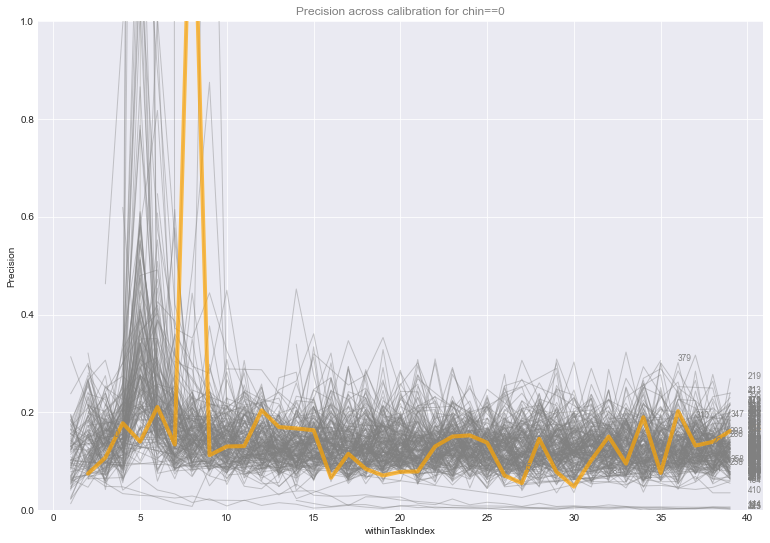

In [90]:
spaghettiPlot(
    data_trial_calibration.loc[
        (
            (data_trial_calibration['chinFirst']==0) &
            (data_trial_calibration['chin']==0)
        ) |
        (
            (data_trial_calibration['chinFirst']==1) &
            (data_trial_calibration['chin']==1)
        )
        , :], 
    'withinTaskIndex', 'precision', 103)
plt.ylim(0, 1)
plt.title('Precision across calibration for chin==0', loc='center', fontsize=12, fontweight=0, color='grey')
plt.xlabel('withinTaskIndex')
plt.ylabel('Precision')

plt.show()

## Categorical confounders

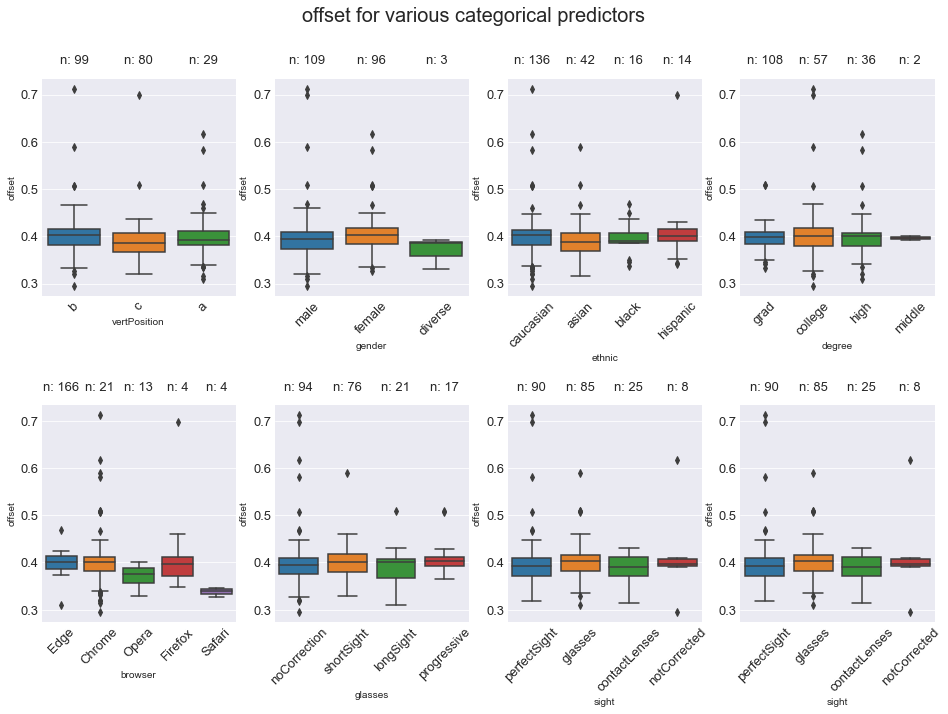

In [91]:
def getBoxPlots(outcome):
    predictors = [
    'vertPosition', 'gender', 'ethnic',  
    'degree', 'browser', 'glasses', 'sight', 'sight']  

    fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(16, 10))
    fig.suptitle(outcome + ' for various categorical predictors', fontsize=20)
    plt.subplots_adjust(hspace=0.5)
        
    
    ax = ax.ravel()
    
    for i in range(0, 8):
        sns.boxplot(ax=ax[i], x=predictors[i], y=outcome, data=data_subject)
        
        ax[i].tick_params(labelrotation=45, labelsize=13)
        ax[i].tick_params(axis='y', labelrotation=None)
        
        nobs = data_subject[predictors[i]].value_counts().values
        nobs = [str(x) for x in nobs.tolist()]
        nobs = ["n: " + i for i in nobs]
        # Add it to the plot
        pos = range(len(nobs))
        
        max_value = data_subject[outcome].max()
        yPos = max_value + max_value * 0.1
        
        for tick,label in zip(pos,ax[i].get_xticklabels()):                
            ax[i].text(
                pos[tick], yPos, nobs[tick],
                verticalalignment='top',
                horizontalalignment='center', size=13, weight='normal')
            
getBoxPlots('offset')

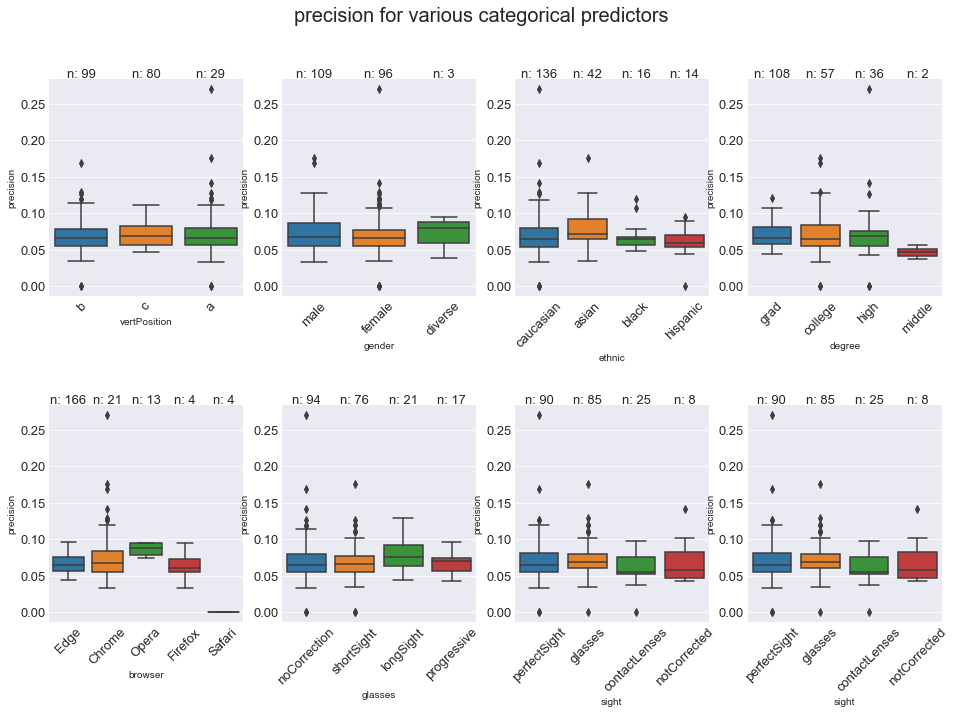

In [92]:
getBoxPlots('precision')

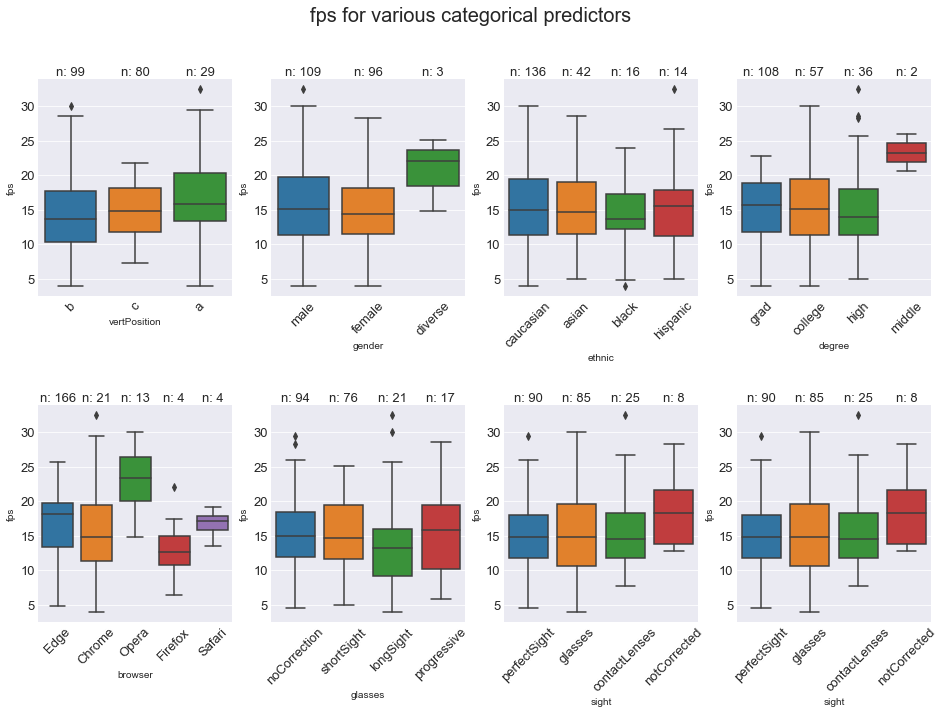

In [93]:
getBoxPlots('fps')

## Correlation Plot

### Clean dataset

In [94]:
data_plot = data_trial_fix \
    .merge(data_subject.loc[:, ['run_id', 'age']], on='run_id', how='left') \
    .loc[:, ['run_id', 'chin', 'x_pos', 'y_pos', 'withinTaskIndex', 'age', 'fps', 'offset', 'precision']]
null_data = data_plot.loc[data_plot.isnull().any(axis=1), :]

if len(null_data)>0:
    print('! Attention ! Missing values')
    print(
        f"""Length of data raw: {len(data_plot)} \n"""
        f"""Excluded runs and trials: \n"""
        f"""{null_data.groupby(['run_id'], as_index=False)['chin'].count().rename(columns={'chin': 'n'})} \n"""
    )
else: 
    print('No missing data found')

data_plot = data_plot.loc[~data_plot.isnull().any(axis=1), :]

print(
        f"""Length of data clean: {len(data_plot)} \n""" 
)

! Attention ! Missing values
Length of data raw: 3743 
Excluded runs and trials: 
   run_id   n
0     436  18 

Length of data clean: 3725 



### Plots

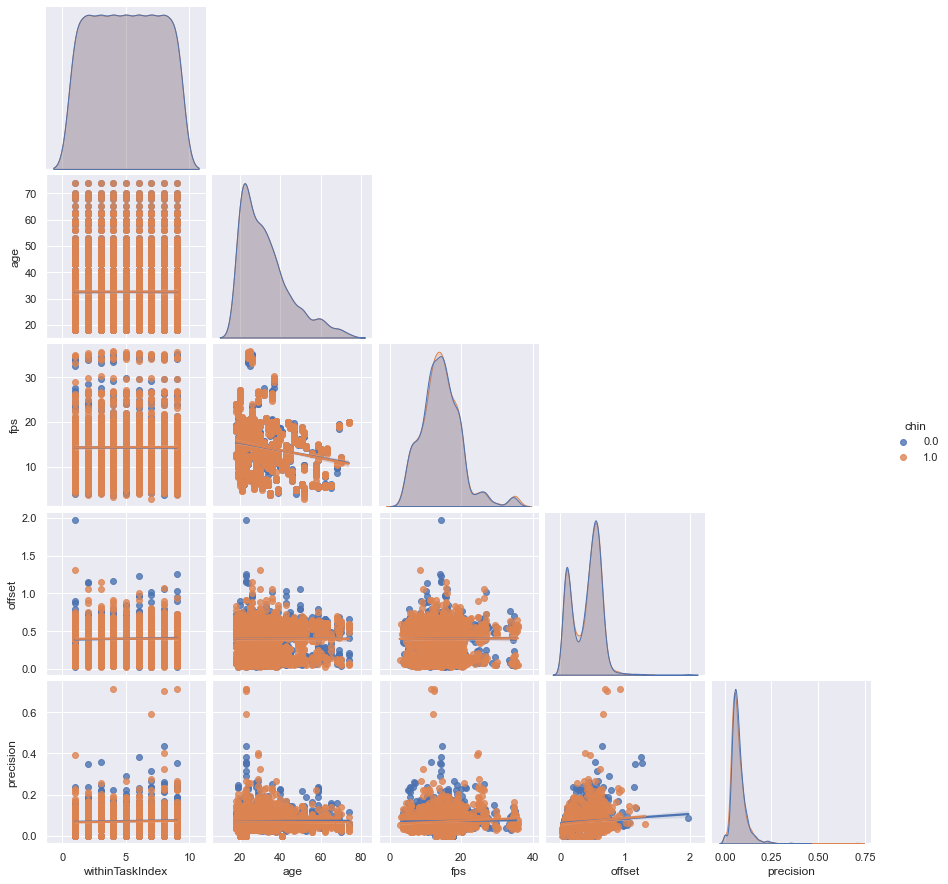

In [95]:
correlation_columns = ['withinTaskIndex', 'age', 'fps', 'offset', 'precision']
sns.set()
sns.pairplot(
    data_plot.loc[:, np.append(correlation_columns, ['chin'])], 
    hue='chin', hue_order = [0.0, 1.0],
    kind='reg', 
    corner=True
)

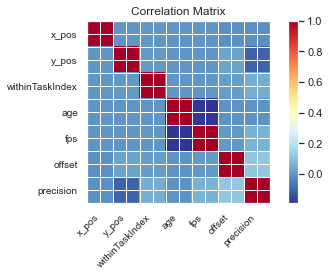

In [96]:
corr_columns = np.append(['x_pos', 'y_pos'], correlation_columns)
corr_matrix = np.corrcoef(data_plot[corr_columns].T)

smg.plot_corr(corr_matrix, xnames=corr_columns)
plt.show()

In [97]:
data_plot[corr_columns].rcorr()

,x_pos,y_pos,withinTaskIndex,age,fps,offset,precision
x_pos,-,,,,,,
y_pos,0.0,-,,,,,***
withinTaskIndex,0.005,0.009,-,,,,***
age,-0.0,0.0,-0.0,-,***,,
fps,-0.0,0.0,0.003,-0.189,-,,***
offset,-0.009,0.031,0.016,-0.004,0.009,-,***
precision,-0.008,-0.103,0.055,-0.006,0.062,0.122,-


In [98]:
data_plot[corr_columns].rcorr(upper='n')

,x_pos,y_pos,withinTaskIndex,age,fps,offset,precision
x_pos,-,3725,3725,3725,3725,3725,3725
y_pos,0.0,-,3725,3725,3725,3725,3725
withinTaskIndex,0.005,0.009,-,3725,3725,3725,3725
age,-0.0,0.0,-0.0,-,3725,3725,3725
fps,-0.0,0.0,0.003,-0.189,-,3725,3725
offset,-0.009,0.031,0.016,-0.004,0.009,-,3725
precision,-0.008,-0.103,0.055,-0.006,0.062,0.122,-


# Export

In [99]:
if not os.path.exists('./data_jupyter/fix_task'):
    os.mkdir('./data_jupyter/fix_task')
    
data_et_fix.to_csv("data_jupyter/fix_task/data_et.csv", index=False, header=True)
data_trial_fix.to_csv("data_jupyter/fix_task/data_trial.csv", index=False, header=True)

data_subject.to_csv("data_jupyter/fix_task/data_subject.csv", index=False, header=True)

# Feedback

In [100]:
print('Success! Script ran through')

Success! Script ran through
